# Using PIs - OPIs, UPIs, OPICs, and UPCIs

## Importing Required Libraries

In [1]:
import music21, pandas

## Defining Functions

### Ordered Pitch Interval (OPI)

In [2]:
# OPI
def get_opi(x, y):
    """
    Get the OPI from a music21 built-in function
    """

    x = music21.note.Note(x)
    y = music21.note.Note(y)

    opi = music21.interval.notesToChromatic(x, y)
    
    return opi.semitones

### Unordered Pitch Interval (UPI)

In [3]:
# UPI
def get_upi(x, y):
    """
    Get the UPI from a music21 built-in function
    """
    
    x = music21.note.Note(x)
    y = music21.note.Note(y)
    
    opi = music21.interval.notesToChromatic(x, y)
    
    return opi.undirected

### Ordered Pitch Class Interval

In [4]:
# OPCI
def get_opci(x, y):
    """
    Use Straus' OPCI 'y - x mod12'
    
    """
    opci = (y - x) % 12
    
    return opci

### Unordered Pitch Class Interval

In [5]:
# UPCI
def get_upci(x, y):
    """
    Use Straus' UPCI, a.k.a. 'interval class'.
    'x - y mod12, whichever one is smaller'
    
    """
    z1 = (x - y) % 12 
    z2 = (y - x) % 12
    
    if(z1 < z2):
        upci = z1
    
    else:
        upci = z2

    return upci

### Take All Intervals and Place into a pandas Dataframe

In [9]:
# Collect all interval types and place them into pandas dataframe.
def get_all_intervals(pitch_sequence):
    
    """
    Find all interval types (according to Straus) in a pitch sequence, and create a dataFrame.
    
    """
    df = pandas.DataFrame(columns=['PCs','opi','upi','opci','upci'])
    
    for i in range(len(pitch_sequence)):
        
        x_pitch = pitch_sequence[i].pitch.pitchClass
        
        if((i + 1) < len(pitch_sequence)):
            y_pitch = pitch_sequence[i + 1].pitch.pitchClass
        else:
            break
        
        data = [
                str(x_pitch) + ' to ' + str(y_pitch), 
                get_opi(x_pitch, y_pitch),
                get_upi(x_pitch, y_pitch), 
                get_opci(x_pitch, y_pitch), 
                get_upci(x_pitch, y_pitch)
        ]
        
        df.loc[i] = data
        
    return(df.T)

## Building a music21 Stream from a Pitch Sequence

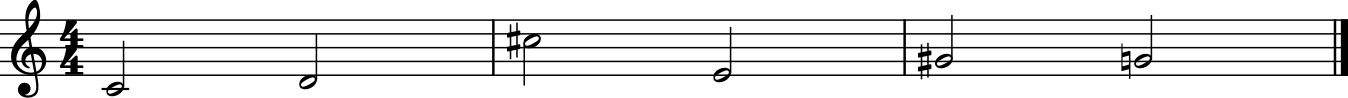

In [10]:
# Decide on a Pitch Sequence
# --------------------------

# Can be written with pitch classes in integer notation
# sequence_of_pitches = [0,2,1,4,8,7]

# Can be written with traditional note names and pitch space specifiers
sequence_of_pitches = ['C4','D4','C#5','E4','G#4','G4']

# Creates music21 Stream to show and hear the pitches
pitch_sequence = music21.stream.Stream()
[pitch_sequence.append(music21.note.Note(x, type='half')) for x in sequence_of_pitches]

# Showing a score
pitch_sequence.show()

# Listening...
pitch_sequence.show('midi') # does not work on GitHub

## Viewing the Dataframe of Intervals from the Pitch Sequence Stream

In [8]:
# Get All Intervals in Pitch Sequence and Place into pandas dataframe
# -------------------------------------------------------------------

get_all_intervals(pitch_sequence)

,0,1,2,3,4
PCs,0 to 2,2 to 1,1 to 4,4 to 8,8 to 7
opi,2,-1,3,4,-1
upi,2,1,3,4,1
opci,2,11,3,4,11
upci,2,1,3,4,1
